In [1]:
import acgan
import twodlearn as tdl
import twodlearn.debug
import tensorflow as tf
from types import SimpleNamespace
import acgan.model.encoder
from acgan.model.encoder import LinearEstimator
sess = tf.InteractiveSession()

In [2]:
#dataset = acgan.data.load_mnist32_3c(32)
#dataset = acgan.data.load_stl10(32, with_label=True)
dataset = acgan.data.load_fashion_mnist_3c(32, with_label=True)
dataset = acgan.data.to_one_hot(dataset, 10)
#dataset = acgan.data.load_celeb_a(32, with_label=True)

In [3]:
train_data = tf.compat.v1.data.make_one_shot_iterator(dataset).get_next()

In [4]:
estimator = LinearEstimator(
    model={'n_classes': 10, 
           'encoder': {
               'embedding_size': 64,
               'layers': {
                   'units': [32, 64, 64, 64],
                   'kernels': 3,
                   'strides': 1,
                   'pooling': 2}}},
    loss={'value':'crossentropy', 'from_logits': True},
    metrics={'metrics': ['accuracy'], 'from_logits': True},
    optimizer={'learning_rate': 0.02}
)
estimator.compile(train_data['image'], train_data['label'])
estimator.trainable_variables = tdl.core.get_trainable(estimator.model)
optim = estimator.get_optimizer(train_data['image'], train_data['label'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
optim.run(n_steps=10000)

step 13990 | acc 0.8891| loss 0.3059: : 10000it [03:03, 54.64it/s]                       


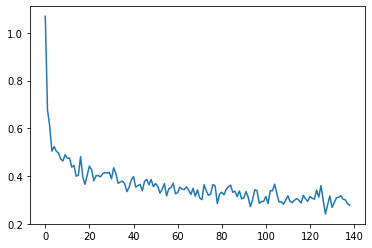

In [10]:
import matplotlib.pyplot as plt
plt.plot(optim.metrics['loss'].as_numpy())

In [14]:
import tensorflow_datasets as tfds
dataset_valid = acgan.data.load_fashion_mnist_3c(
    32, split=tfds.Split.TEST, with_label=True)
dataset_valid = acgan.data.to_one_hot(dataset_valid, 10)

In [10]:
estimator.model.encoder.model.layers.layers[0].residual.layers[0].kernel

<tf.Tensor 'LinearEstimator/model/LinearClassifier/encoder/ResConv/layers/Conv2DLayer/kernel/mul:0' shape=(3, 3, 3, 32) dtype=float32>

In [22]:
resnet = estimator.model.encoder.model.layers.layers
outputs = [train_data['image']]
for layer in resnet:
    outputs.append(layer(outputs[-1])) 

In [23]:
outputs

[<tf.Tensor 'IteratorGetNext:0' shape=(?, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'LinearEstimator/model/LinearClassifier/encoder/ResConv/layers/ResConv2D_4/add:0' shape=(?, 32, 32, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 16, 16, 32) dtype=float32>,
 <tf.Tensor 'LinearEstimator/model/LinearClassifier/encoder/ResConv/layers/ResConv2D_1_1/add:0' shape=(?, 16, 16, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 8, 8, 64) dtype=float32>,
 <tf.Tensor 'LinearEstimator/model/LinearClassifier/encoder/ResConv/layers/ResConv2D_2_1/add:0' shape=(?, 8, 8, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 4, 4, 64) dtype=float32>,
 <tf.Tensor 'LinearEstimator/model/LinearClassifier/encoder/ResConv/layers/ResConv2D_3_1/add:0' shape=(?, 4, 4, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 2, 2, 64) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(?, 256) dtype=float32>,

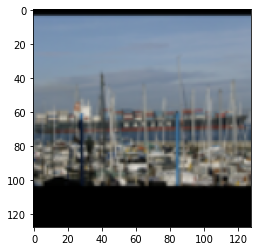

In [22]:
import matplotlib.pyplot as plt

plt.imshow((out['image'][7, ...]+1)/2)

In [3]:
RemoteShare.list_remote_models()

marinodl: ['wacgan']


In [4]:
RemoteShare('wacgan').list_remote()

['session_20200604_0816_cifar10', 'session_20200609_0921_celeba_big']

In [65]:
acgan.params.PARAMS['celeb_a']['gmmgan']['model']['encoder']

{'units': [32, 64, 64, 64], 'kernels': 3, 'strides': 1, 'pooling': 2}

In [27]:
_test = xreal.shape[1:-1]

In [30]:
_test.as_list()

[64, 64]

In [34]:
tf.TensorShape([2,3,4, 5])[:1].concatenate([2,3])

TensorShape([Dimension(2), Dimension(2), Dimension(3)])

In [37]:
32%16

0

In [42]:
16%36

16

In [46]:
list(a for a, b in zip(tf.TensorShape([2,3,4, 5]).as_list(), tf.TensorShape([2,3,4, 5])))

[2, 3, 4, 5]

In [48]:
[1,2] == [1,2]

True